In [1]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
import imghdr
from PIL import Image
import shutil
from matplotlib import pyplot as plt

import tensorflow as tf
import pandas as pd
from random import shuffle
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
img = cv2.imread('C:/Nikita/Parser/the whole 52 cards deck/2C/0000.jpg')

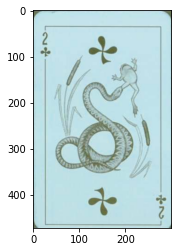

In [11]:
imshow(img)

In [12]:
assert 'GPU' in tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

In [5]:
data = np.load('C:/Nikita/Parser/data.npy', allow_pickle=True)

In [6]:
x = data[:, 0]
y = data[:, 1]

In [7]:
len(np.unique(y))

52

In [8]:
classes = np.unique(y)
numbers = list(range(len(classes)))
replacement_dict = dict(zip(classes, numbers))

for key in replacement_dict.keys():
    np.place(y, y == key, replacement_dict[key])
    
y = to_categorical(y)

In [9]:
x_new = []
for i in range (len(x)):
    x_new.append(np.array(x[i][0]))
    
x = np.array(x_new)
x.shape

(52569, 180, 180, 1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [11]:
for item in (x_train, y_train, x_test, y_test):
    print(item.shape)

(42055, 180, 180, 1)
(42055, 52)
(10514, 180, 180, 1)
(10514, 52)


In [12]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=25
batch_size=32

model = tf.keras.models.Sequential()

In [ ]:
# plt.imshow(x_train[2].reshape(180,180), cmap = 'Greys')

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(52, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)      

In [15]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="C:/Nikita/Cards recognition/25epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)

# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[cp]).history

Epoch 1/25
1315/1315 [==============================] - 51s 39ms/step - loss: 0.6122 - accuracy: 0.8877 - val_loss: 0.4483 - val_accuracy: 0.9148
Epoch 2/25
1315/1315 [==============================] - 51s 39ms/step - loss: 0.5973 - accuracy: 0.8852 - val_loss: 0.6890 - val_accuracy: 0.8917
Epoch 3/25
1315/1315 [==============================] - 52s 39ms/step - loss: 1.1670 - accuracy: 0.8820 - val_loss: 0.4331 - val_accuracy: 0.9425
Epoch 4/25
1315/1315 [==============================] - 52s 39ms/step - loss: 0.6747 - accuracy: 0.8856 - val_loss: 0.5108 - val_accuracy: 0.9271
Epoch 5/25
1315/1315 [==============================] - 52s 39ms/step - loss: 0.7195 - accuracy: 0.8728 - val_loss: 1.2982 - val_accuracy: 0.8884
Epoch 6/25
1315/1315 [==============================] - 52s 40ms/step - loss: 0.7215 - accuracy: 0.8780 - val_loss: 0.5226 - val_accuracy: 0.9211
Epoch 7/25
1315/1315 [==============================] - 52s 39ms/step - loss: 0.7183 - accuracy: 0.8767 - val_loss: 0.9669 -

In [2]:
from matplotlib import pyplot as plt
plt.plot(history['accuracy'], label = 'Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.save('C:/Nikita/Cards recognition/model_52cards.h5')

In [13]:
model.load('C:/Nikita/Cards recognition/model_52cards.h5')

NameError: name 'model' is not defined

In [24]:
img = cv2.imread('C:/Nikita/Playing cards/12.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (180, 180))

img.shape

test_card = img.reshape((1, img.shape[0], img.shape[1], 1))

# plt.imshow(test_card.reshape(180,180), cmap = 'Greys')

prediction = model.predict(test_card)
print(np.argmax(prediction), np.max(prediction))

36 0.27808857


In [298]:
prediction

array([[3.0829231e-08, 2.3873031e-07, 2.6982431e-07, 5.5213697e-17,
        9.0021873e-10, 3.7110545e-05, 7.0160513e-09, 1.6511022e-15,
        4.2992385e-04, 3.3545555e-10, 2.1047830e-11, 1.7927897e-13,
        1.1705093e-12, 4.8520275e-07, 3.8004509e-05, 5.6759442e-09,
        1.2944342e-06, 1.0021119e-02, 4.0849794e-05, 7.4397508e-07,
        1.1918572e-05, 1.2327678e-04, 1.3965407e-05, 1.0214587e-04,
        3.2465374e-03, 2.3038100e-02, 5.6448895e-03, 4.1780114e-04,
        6.7028836e-03, 2.4985094e-04, 9.5042764e-05, 4.8185620e-02,
        1.4066274e-08, 3.7417747e-04, 1.0346625e-05, 5.8126468e-03,
        1.8250122e-07, 5.6341948e-04, 2.4508580e-03, 6.5125879e-03,
        9.3335100e-04, 2.9850699e-04, 8.6371052e-01, 2.9067142e-04,
        3.8183671e-06, 1.7612318e-02, 8.4628660e-04, 9.7205426e-04,
        2.5017234e-04, 6.1939951e-05, 8.7869732e-04, 1.5339110e-05]],
      dtype=float32)

In [14]:
replacement_dict

{'2C': 0,
 '2D': 1,
 '2H': 2,
 '2S': 3,
 '3C': 4,
 '3D': 5,
 '3H': 6,
 '3S': 7,
 '4C': 8,
 '4D': 9,
 '4H': 10,
 '4S': 11,
 '5C': 12,
 '5D': 13,
 '5H': 14,
 '5S': 15,
 '6C': 16,
 '6D': 17,
 '6H': 18,
 '6S': 19,
 '7C': 20,
 '7D': 21,
 '7H': 22,
 '7S': 23,
 '8C': 24,
 '8D': 25,
 '8H': 26,
 '8S': 27,
 '9C': 28,
 '9D': 29,
 '9H': 30,
 '9S': 31,
 'AC': 32,
 'AD': 33,
 'AH': 34,
 'AS': 35,
 'JC': 36,
 'JD': 37,
 'JH': 38,
 'JS': 39,
 'KC': 40,
 'KD': 41,
 'KH': 42,
 'KS': 43,
 'QC': 44,
 'QD': 45,
 'QH': 46,
 'QS': 47,
 'TC': 48,
 'TD': 49,
 'TH': 50,
 'TS': 51}